In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")


In [17]:
# Detect path relative to this notebook
current_dir = os.getcwd()
data_path = os.path.join(current_dir, '../data/online_retail_ii.xlsx')

df = pd.read_excel(data_path, sheet_name='Year 2010-2011')
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape: (541910, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
# Standardize column names
df.columns = df.columns.str.strip()

# Drop rows missing Customer ID
df = df.dropna(subset=['Customer ID'])

# Remove negative quantities (cancelled invoices)
df = df[df['Quantity'] > 0]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create TotalPrice from Quantity × Price
df['TotalPrice'] = df['Quantity'] * df['Price']

# Rename Invoice to InvoiceNo if needed
if 'Invoice' in df.columns and 'InvoiceNo' not in df.columns:
    df.rename(columns={'Invoice': 'InvoiceNo'}, inplace=True)

print("✅ Cleaned data ready.")
df.head()


✅ Cleaned data ready.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [20]:
print("DataFrame Info:")
print(df.info())
print("\nDescriptive Statistics:")
df.describe()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 397925 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397925 non-null  object        
 1   StockCode    397925 non-null  object        
 2   Description  397925 non-null  object        
 3   Quantity     397925 non-null  int64         
 4   InvoiceDate  397925 non-null  datetime64[ns]
 5   Price        397925 non-null  float64       
 6   Customer ID  397925 non-null  float64       
 7   Country      397925 non-null  object        
 8   TotalPrice   397925 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB
None

Descriptive Statistics:


,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
count,397925.000000,397925,397925.000000,397925.000000,397925.000000
mean,13.021793,2011-07-10 23:44:09.817126400,3.116212,15294.308601,22.394737
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,180.419984,NaN,22.096773,1713.172738,309.055200


C:\Users\bhave\AppData\Local\Temp\ipykernel_7884\244494252.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()
d:\certificates and related\projects\Data Analytics\Ecommerce_Customer_Behavior\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
d:\certificates and related\projects\Data Analytics\Ecommerce_Customer_Behavior\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
d:\certificates and related\projects\Data Analytics\Ecommerce_Customer_Behavior\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.pr

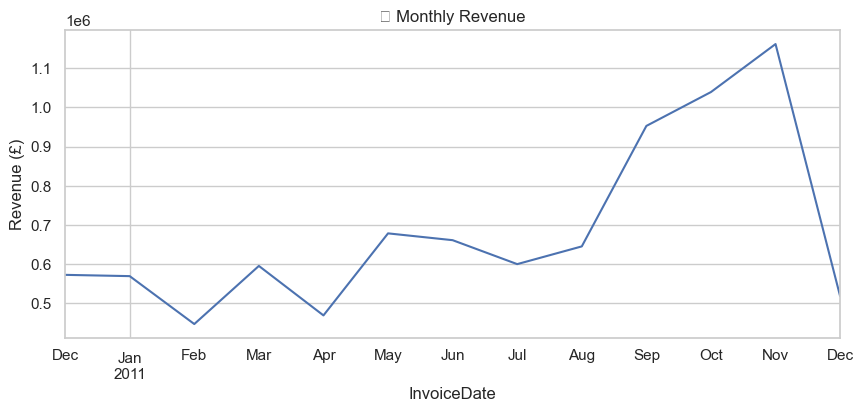

In [21]:
monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()

plt.figure(figsize=(10,4))
monthly_sales.plot(title='📈 Monthly Revenue')
plt.ylabel('Revenue (£)')
plt.grid(True)
plt.show()


d:\certificates and related\projects\Data Analytics\Ecommerce_Customer_Behavior\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


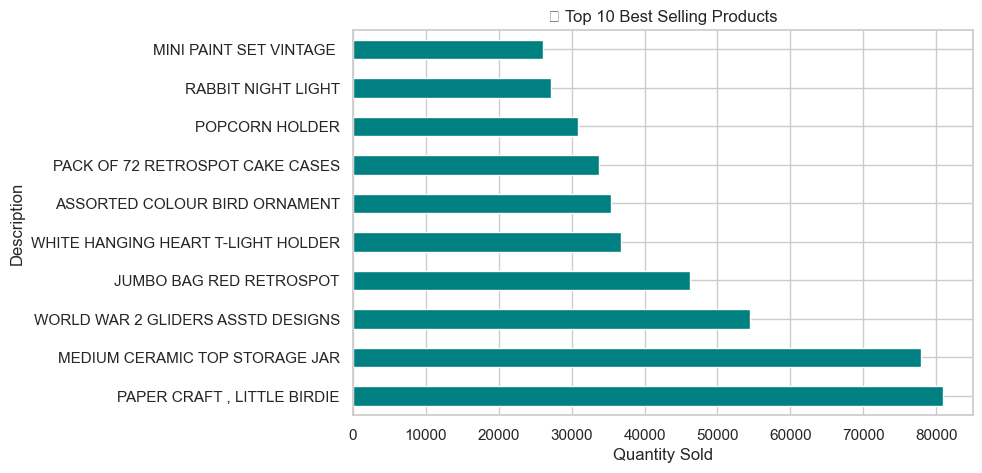

In [22]:
top_products = (
    df.groupby('Description')['Quantity']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(8,5))
top_products.plot(kind='barh', color='teal')
plt.title('🏆 Top 10 Best Selling Products')
plt.xlabel('Quantity Sold')
plt.show()


C:\Users\bhave\AppData\Local\Temp\ipykernel_7884\1708725709.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
d:\certificates and related\projects\Data Analytics\Ecommerce_Customer_Behavior\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


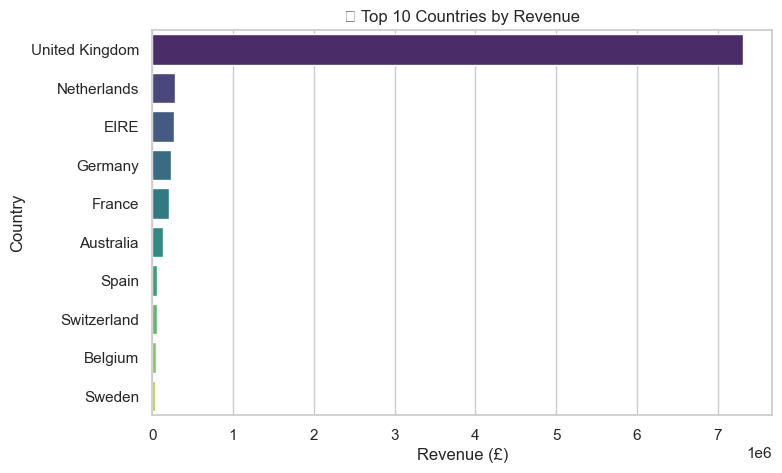

In [23]:
top_countries = (
    df.groupby('Country')['TotalPrice']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('🌍 Top 10 Countries by Revenue')
plt.xlabel('Revenue (£)')
plt.show()
